In [1]:
from IPython.display import display
import mglearn

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler()

In [3]:
X_train_scaled = scaler.fit_transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("Test Score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test Score: 0.95


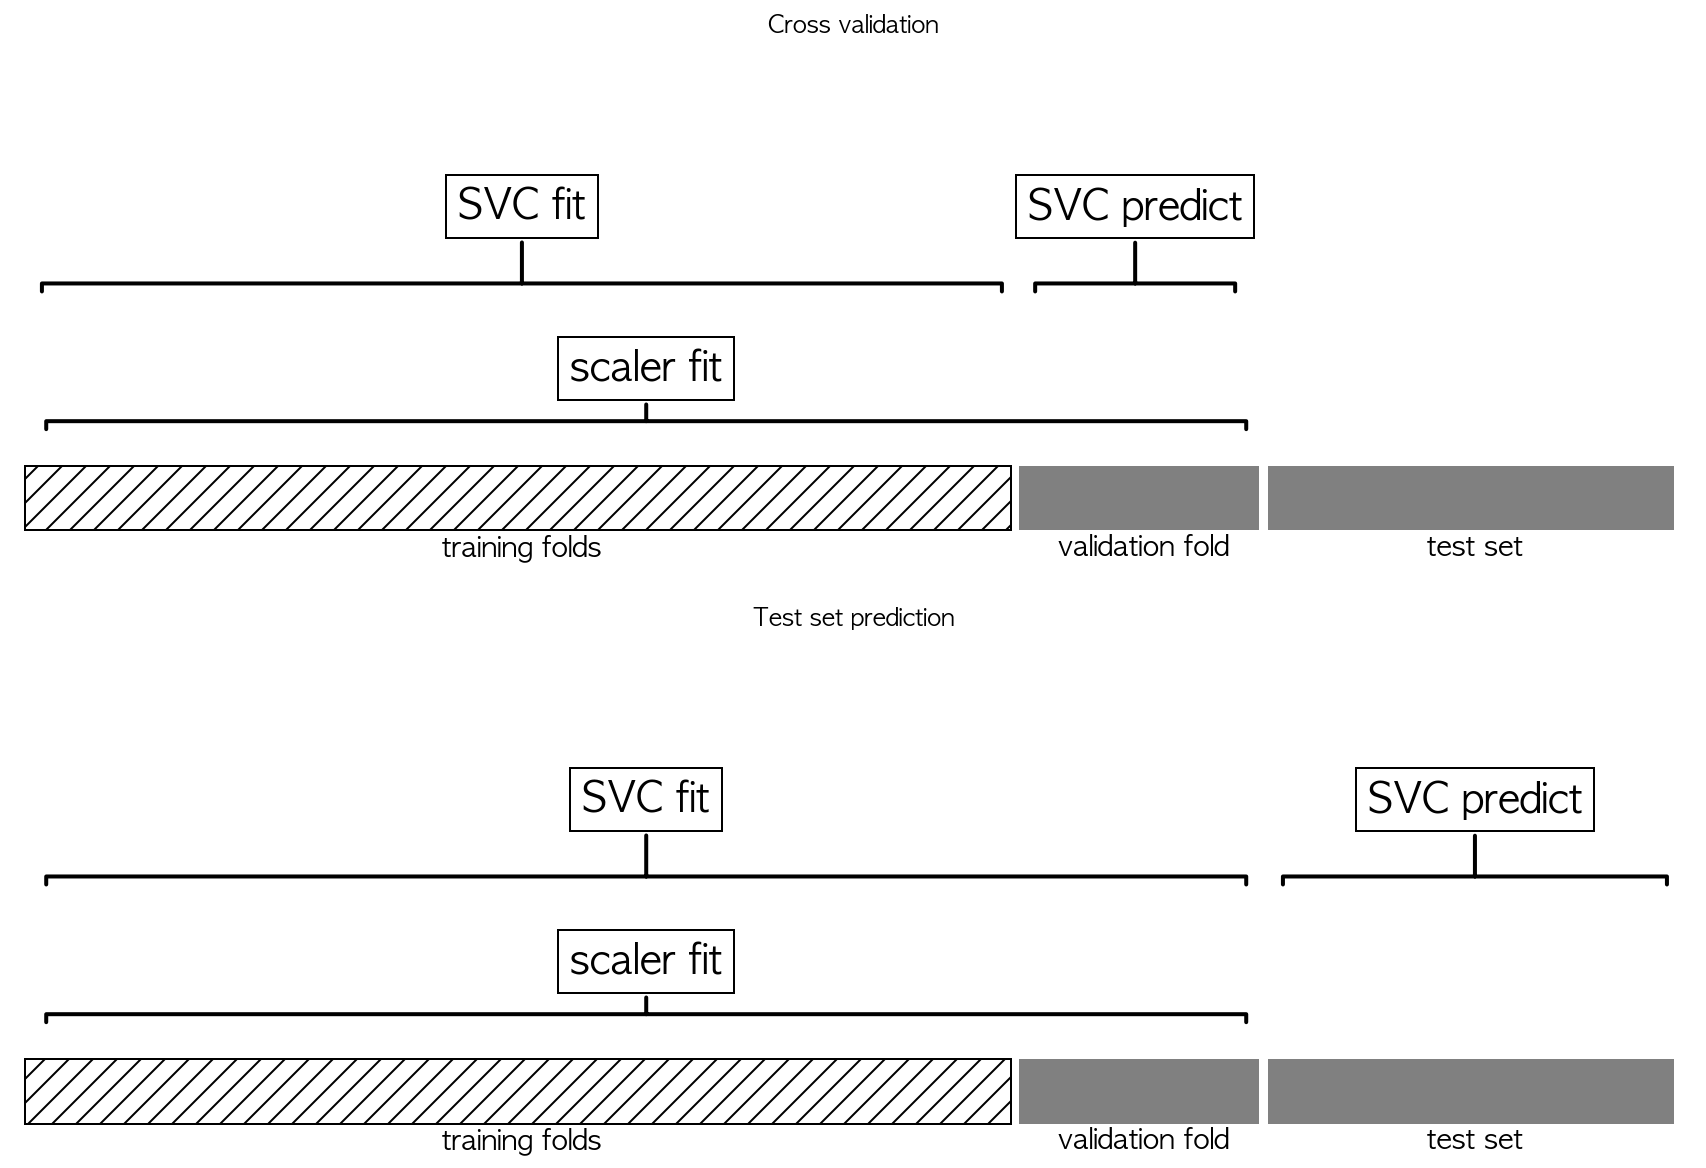

In [4]:
mglearn.plots.plot_improper_processing()

In [5]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("Scaler", MinMaxScaler()), ("svm", SVC())])

In [6]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [7]:
print("Test Scor: {:.2f}".format(pipe.score(X_test, y_test)))

Test Scor: 0.95


In [8]:
param_grid = {"svm__C": [0.001, 0.01, 0.1, 1, 10, 100], 
              "svm__gamma": [0.001, 0.01, 0.1, 1, 10, 100]}

In [9]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best CV Score: {:.2f}".format(grid.best_score_))
print("Test Score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best Parameters: {}".format(grid.best_params_))

Best CV Score: 0.98
Test Score: 0.97
Best Parameters: {'svm__C': 1, 'svm__gamma': 1}


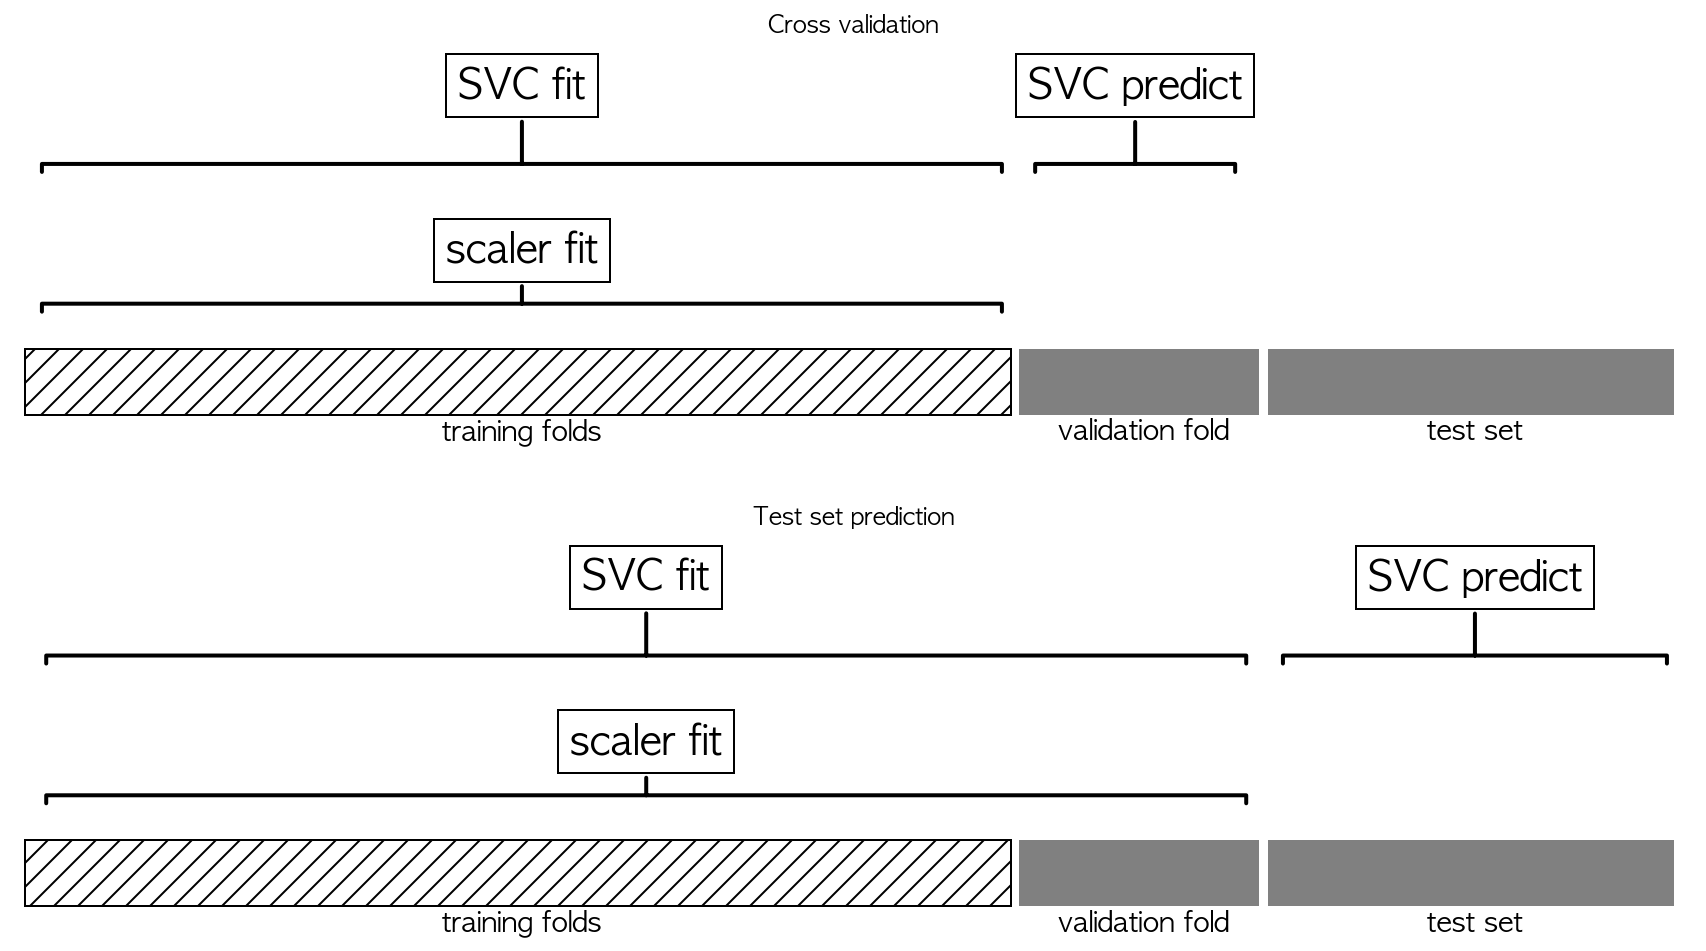

In [10]:
mglearn.plots.plot_proper_processing()

In [11]:
# 정규분포로부터 독립적으로 추출한 10,000개의 특성을 가진 샘플 100개

rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

In [12]:
# SelectPercentile로 유용한 피처를 선택하고 교차 검증을 사용해 Ridge 회귀 평가

from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print("X_selected.shape: {}".format(X_selected.shape))

X_selected.shape: (100, 500)


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print("CV Score (Ridge): {:.2f}".format(
    np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))))

CV Score (Ridge): 0.91


In [14]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression, 
                                             percentile=5)), 
                 ("ridge", Ridge())])
print("CV score (Pipeline): {:.2f}".format(
    np.mean(cross_val_score(pipe, X, y, cv=5))))

CV score (Pipeline): -0.25


In [15]:
def fit(self, X, y):
    X_transformed = X
    for name, estimoatr in self.stpes[:-1]:
        X_transformed = estimoatr.fit_transform(X_transformed, y)
    self.steps[-1][1].fit(X_transformed, y)
    return self

In [16]:
def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        X_transformed = step[1].transform(X_transformed)
    return self.setpe[-1][1].predict(X_transformed)

In [17]:
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [18]:
print("pipe steps:\n{}".format(pipe_short.steps))

pipe steps:
[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("pipeline steps:\n{}".format(pipe.steps))

pipeline steps:
[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


In [20]:
pipe.fit(cancer.data)

components = pipe.named_steps["pca"].components_
print("components.step: {}".format(components.shape))

components.step: (2, 30)


In [21]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [22]:
param_grid = {"logisticregression__C": [0.01, 0.1, 1, 10, 100]}

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
print("Best model:\n{}".format(grid.best_estimator_))

Best model:
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [25]:
print("Logistic regression step:\n{}".format(
    grid.best_estimator_.named_steps["logisticregression"]))

Logistic regression step:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [26]:
print("Logistic Regression Coefficients:\n{}".format(
    grid.best_estimator_.named_steps["logisticregression"].coef_))

Logistic Regression Coefficients:
[[-0.38856355 -0.37529972 -0.37624793 -0.39649439 -0.11519359  0.01709608
  -0.3550729  -0.38995414 -0.05780518  0.20879795 -0.49487753 -0.0036321
  -0.37122718 -0.38337777 -0.04488715  0.19752816  0.00424822 -0.04857196
   0.21023226  0.22444999 -0.54669761 -0.52542026 -0.49881157 -0.51451071
  -0.39256847 -0.12293451 -0.38827425 -0.4169485  -0.32533663 -0.13926972]]


In [27]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(), 
                     PolynomialFeatures(), 
                     Ridge())

In [28]:
param_grid = {"polynomialfeatures__degree": [1, 2, 3], 
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [30]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

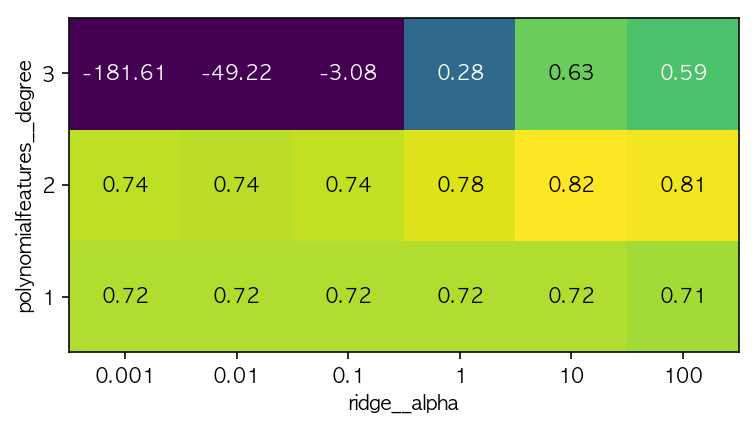

In [32]:
mglearn.tools.heatmap(grid.cv_results_["mean_test_score"].reshape(3, -1), 
                      xlabel="ridge__alpha", ylabel="polynomialfeatures__degree", 
                      xticklabels=param_grid["ridge__alpha"], 
                      yticklabels=param_grid["polynomialfeatures__degree"], vmin=0)

In [33]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [34]:
param_grid = {"ridge__alpha": [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Score without polynomial features: {:.2f}".format(grid.score(X_test, y_test)))

Score without polynomial features: 0.63


In [35]:
pipe = Pipeline([("preprocessing", StandardScaler()), ("classifier", SVC())])

In [36]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {"classifier": [SVC()], "preprocessing": [StandardScaler()], 
     "classifier__gamma": [0.001, 0.01, 0.1, 1, 10, 100], 
     "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100]}, 
    {"classifier": [RandomForestClassifier(n_estimators=100)], 
     "preprocessing": [None], "classifier__max_features": [1, 2, 3]}
]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:\n{}\n".format(grid.best_params_))
print("Best CV Score: {:.2f}".format(grid.best_score_))
print("Test Score: {:.2f}".format(grid.score(X_test, y_test)))

Best parameters:
{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best CV Score: 0.99
Test Score: 0.98
